In [4]:
import pandas as pd

In [10]:
titanic = pd.read_csv(
    "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv",
    index_col="PassengerId"
)
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [11]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:ylabel='Frequency'>

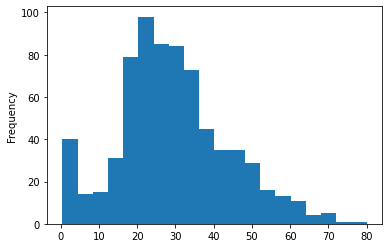

In [12]:
# task: visualize the age distribution on the Titanic

titanic["Age"].plot.hist(bins=20)

<AxesSubplot:>

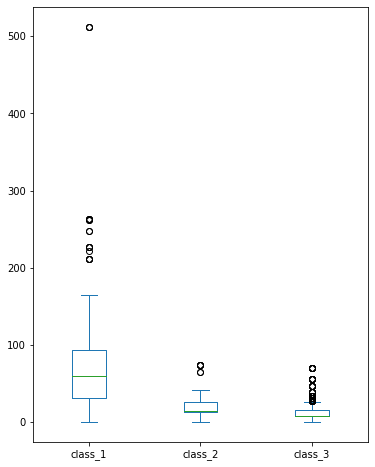

In [13]:
# task: analyze the fare for each of the three passenger classes
# create a plot that visualizes the fares

pass_1_fares = titanic[titanic["Pclass"] == 1]["Fare"]
pass_2_fares = titanic[titanic["Pclass"] == 2]["Fare"]
pass_3_fares = titanic[titanic["Pclass"] == 3]["Fare"]

fares = pd.DataFrame({
    "class_1": pass_1_fares,
    "class_2": pass_2_fares,
    "class_3": pass_3_fares
})
fares.plot.box(figsize= (6, 8))

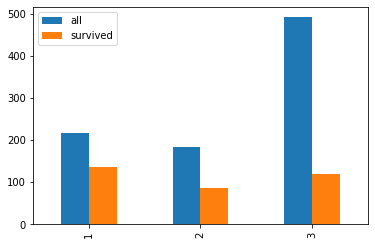

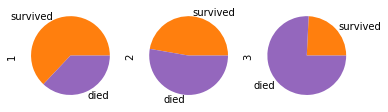

In [34]:
# task: how many people were in each class (1, 2, 3)
# and how many of each class survived?
# - visualize the absolute amounts in a bar chart
# - visualize the percentages in a pie chart with three pies

passengers_class_counts = titanic["Pclass"].value_counts().sort_index()
survived = titanic[titanic["Survived"] == 1]
survived_class_counts = survived["Pclass"].value_counts().sort_index()
died_class_counts = passengers_class_counts - survived_class_counts

pd.DataFrame({
    "all": passengers_class_counts,
    "survived": survived_class_counts
}).plot.bar()

pd.DataFrame({
    "survived": survived_class_counts,
    "died": died_class_counts
}).transpose().plot.pie(subplots=True, colors=["C1", "C4"], legend=False);

In [36]:
crosstab = pd.DataFrame({
    "survived": survived_class_counts,
    "died": died_class_counts
})

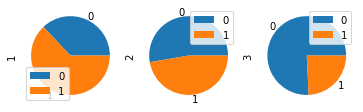

In [43]:
pd.crosstab(titanic["Survived"], titanic["Pclass"]).plot.pie(subplots=True);

In [44]:
titanic.to_sql()

TypeError: to_sql() missing 2 required positional arguments: 'name' and 'con'